# 派单模型

## time：2015-12-14

### train_data：南京2015-12-09和南京2015-12-10的派单数据
### test_data：南京2015-12-11/2015-12-12/2015-12-13/2015-12-14/2015-12-15的派单数据

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [162]:
#读入数据()
paidan_data = pd.read_csv('paidan_data/paidan_model_data_nanjing.csv', index_col = 1)
paidan_data = paidan_data.fillna(value = 0)


#异常值处理
paidan_data.loc[paidan_data.paidan_receiver_distance_jiedan_supplier_max > 10000,"paidan_receiver_distance_jiedan_supplier_max"] = paidan_data["paidan_receiver_distance_jiedan_supplier_max"][paidan_data.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan_data.loc[paidan_data.paidan_receiver_distance_jiedan_supplier_min > 10000,"paidan_receiver_distance_jiedan_supplier_min"] = paidan_data["paidan_receiver_distance_jiedan_supplier_min"][paidan_data.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan_data.loc[paidan_data.paidan_supplier_distance_jiedan_supplier_max > 10000,"paidan_supplier_distance_jiedan_supplier_max"] = paidan_data["paidan_supplier_distance_jiedan_supplier_max"][paidan_data.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan_data.loc[paidan_data.paidan_supplier_distance_jiedan_supplier_min > 10000,"paidan_supplier_distance_jiedan_supplier_min"] = paidan_data["paidan_supplier_distance_jiedan_supplier_min"][paidan_data.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan_data.loc[paidan_data.paidan_receiver_distance_jiedan_receiver_max > 10000,"paidan_receiver_distance_jiedan_receiver_max"] = paidan_data["paidan_receiver_distance_jiedan_receiver_max"][paidan_data.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan_data.loc[paidan_data.paidan_receiver_distance_jiedan_receiver_min > 10000,"paidan_receiver_distance_jiedan_receiver_min"] = paidan_data["paidan_receiver_distance_jiedan_receiver_min"][paidan_data.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan_data.loc[paidan_data.paidan_supplier_distance_jiedan_receiver_max > 10000,"paidan_supplier_distance_jiedan_receiver_max"] = paidan_data["paidan_supplier_distance_jiedan_receiver_max"][paidan_data.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan_data.loc[paidan_data.paidan_supplier_distance_jiedan_receiver_min > 10000,"paidan_supplier_distance_jiedan_receiver_min"] = paidan_data["paidan_supplier_distance_jiedan_receiver_min"][paidan_data.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan_data.loc[paidan_data.supplier_receiver_distance > 10000,"supplier_receiver_distance"] = paidan_data["supplier_receiver_distance"][paidan_data.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan_data.loc[paidan_data.transporter_supplier_distance > 10000,"transporter_supplier_distance"] = paidan_data["transporter_supplier_distance"][paidan_data.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()


varl_ten = ['supplier_receiver_distance',
        'transporter_supplier_distance',
        'today_finish_order_num',
        'transporter_before_fourteen_day_paidan_lv',
        'paidan_receiver_distance_jiedan_receiver_min',
        'paidan_supplier_distance_jiedan_receiver_min',
        'paidan_hour',
        'transporter_before_seven_day_paidan_lv',
        'paidan_supplier_distance_jiedan_receiver_max',
        'paidan_receiver_distance_jiedan_receiver_max',
        'allowance_amt']

varl_tweenty = ['supplier_receiver_distance',
        'transporter_supplier_distance',
        'today_finish_order_num',
        'transporter_before_fourteen_day_paidan_lv',
        'paidan_receiver_distance_jiedan_receiver_min',
        'paidan_supplier_distance_jiedan_receiver_min',
        'paidan_hour',
        'transporter_before_seven_day_paidan_lv',
        'paidan_supplier_distance_jiedan_receiver_max',
        'paidan_receiver_distance_jiedan_receiver_max',
        'allowance_amt',
        'paidan_supplier_distance_jiedan_supplier_min',
        'transporter_before_seven_day_paidan_num',
        'paidan_receiver_distance_jiedan_supplier_min',
        'supplier_before_fourteen_day_paidan_lv',
        'transporter_before_fourteen_day_jiedan_num',
        'supplier_before_seven_day_jiedan_lv',
        'transporter_before_fourteen_day_paidan_success_num',
        'transporter_before_fourteen_day_paidan_num',
        'transporter_supplier_before_fourteen_day_paidan_lv']

#区分目标变量和
y_train = paidan_data.iloc[:,-1]
x_train = paidan_data.ix[:,varl_tweenty]
#x_train = paidan_data.ix[:,:-1]
#变量删除和组合
# del x_train['create_dt']
# del x_train['order_source_from']
# del x_train['is_cargo_advance_needed']
# del x_train['transporter_before_one_day_paidan_num']
# del x_train['transporter_before_seven_day_paidan_num']
# del x_train['transporter_before_fourteen_day_paidan_num']
# del x_train['supplier_before_one_day_paidan_num']
# del x_train['supplier_before_seven_day_paidan_num']
# del x_train['supplier_before_fourteen_day_paidan_num']
# del x_train['transporter_supplier_before_one_day_paidan_num']
# del x_train['transporter_supplier_before_seven_day_paidan_num']
# del x_train['transporter_supplier_before_fourteen_day_paidan_num']

# x_train['fee'] = x_train['tips_amt'] + x_train['fee_sum']
# del x_train['tips_amt']
# del x_train['allowance_amt']
# del x_train['deliver_fee_amt']
# del x_train['fee_sum']


#最大最小归一化
x_train_columns = x_train.columns
x_train_index = x_train.index
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns = x_train_columns, index = x_train_index)


#区分测试集训练集
#train_data = paidan_data.sample(frac=0.7, random_state=1)
#test_data = paidan_data.loc[~paidan_data.index.isin(train_data.index)]


In [118]:
x_train.describe()

,supplier_receiver_distance,transporter_supplier_distance,today_finish_order_num,transporter_before_fourteen_day_paidan_lv,paidan_receiver_distance_jiedan_receiver_min,paidan_supplier_distance_jiedan_receiver_min,paidan_hour,transporter_before_seven_day_paidan_lv,paidan_supplier_distance_jiedan_receiver_max,paidan_receiver_distance_jiedan_receiver_max,allowance_amt
count,36003.000000,36003.000000,36003.000000,36003.000000,36003.000000,36003.000000,36003.000000,36003.000000,36003.000000,36003.000000,36003.000000
mean,0.139928,0.111525,0.126648,0.302636,0.010897,0.034971,0.637431,0.313076,0.042036,0.023955,0.202132
std,0.096060,0.117352,0.157904,0.207864,0.040651,0.085837,0.169822,0.224978,0.097762,0.071730,0.153374
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067580,0.045706,0.000000,0.134620,0.000000,0.000000,0.478261,0.125000,0.000000,0.000000,0.130435
50%,0.123231,0.086786,0.056604,0.295080,0.000000,0.000000,0.608696,0.300000,0.000000,0.000000,0.173913
75%,0.191960,0.137457,0.207547,0.444440,0.000000,0.000000,0.782609,0.466670,0.000000,0.000000,0.217391
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [163]:
#读入数据
paidan = pd.read_csv('paidan_data/paidan_model_test_data_1212.csv', index_col = 1)
paidan = paidan.fillna(value = 0)


#异常值处理
paidan.loc[paidan.paidan_receiver_distance_jiedan_supplier_max > 10000,"paidan_receiver_distance_jiedan_supplier_max"] = paidan["paidan_receiver_distance_jiedan_supplier_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_receiver_distance_jiedan_supplier_min > 10000,"paidan_receiver_distance_jiedan_supplier_min"] = paidan["paidan_receiver_distance_jiedan_supplier_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_supplier_max > 10000,"paidan_supplier_distance_jiedan_supplier_max"] = paidan["paidan_supplier_distance_jiedan_supplier_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_supplier_min > 10000,"paidan_supplier_distance_jiedan_supplier_min"] = paidan["paidan_supplier_distance_jiedan_supplier_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_receiver_distance_jiedan_receiver_max > 10000,"paidan_receiver_distance_jiedan_receiver_max"] = paidan["paidan_receiver_distance_jiedan_receiver_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_receiver_distance_jiedan_receiver_min > 10000,"paidan_receiver_distance_jiedan_receiver_min"] = paidan["paidan_receiver_distance_jiedan_receiver_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_receiver_max > 10000,"paidan_supplier_distance_jiedan_receiver_max"] = paidan["paidan_supplier_distance_jiedan_receiver_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_receiver_min > 10000,"paidan_supplier_distance_jiedan_receiver_min"] = paidan["paidan_supplier_distance_jiedan_receiver_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.supplier_receiver_distance > 10000,"supplier_receiver_distance"] = paidan["supplier_receiver_distance"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.transporter_supplier_distance > 10000,"transporter_supplier_distance"] = paidan["transporter_supplier_distance"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()


# del paidan['create_dt']
# del paidan['order_source_from']
# del paidan['is_cargo_advance_needed']
# del paidan['transporter_before_one_day_paidan_num']
# del paidan['transporter_before_seven_day_paidan_num']
# del paidan['transporter_before_fourteen_day_paidan_num']
# del paidan['supplier_before_one_day_paidan_num']
# del paidan['supplier_before_seven_day_paidan_num']
# del paidan['supplier_before_fourteen_day_paidan_num']
# del paidan['transporter_supplier_before_one_day_paidan_num']
# del paidan['transporter_supplier_before_seven_day_paidan_num']
# del paidan['transporter_supplier_before_fourteen_day_paidan_num']




varl_ten = ['supplier_receiver_distance',
        'transporter_supplier_distance',
        'today_finish_order_num',
        'transporter_before_fourteen_day_paidan_lv',
        'paidan_receiver_distance_jiedan_receiver_min',
        'paidan_supplier_distance_jiedan_receiver_min',
        'paidan_hour',
        'transporter_before_seven_day_paidan_lv',
        'paidan_supplier_distance_jiedan_receiver_max',
        'paidan_receiver_distance_jiedan_receiver_max',
        'allowance_amt']

varl_tweenty = ['supplier_receiver_distance',
        'transporter_supplier_distance',
        'today_finish_order_num',
        'transporter_before_fourteen_day_paidan_lv',
        'paidan_receiver_distance_jiedan_receiver_min',
        'paidan_supplier_distance_jiedan_receiver_min',
        'paidan_hour',
        'transporter_before_seven_day_paidan_lv',
        'paidan_supplier_distance_jiedan_receiver_max',
        'paidan_receiver_distance_jiedan_receiver_max',
        'allowance_amt',
        'paidan_supplier_distance_jiedan_supplier_min',
        'transporter_before_seven_day_paidan_num',
        'paidan_receiver_distance_jiedan_supplier_min',
        'supplier_before_fourteen_day_paidan_lv',
        'transporter_before_fourteen_day_jiedan_num',
        'supplier_before_seven_day_jiedan_lv',
        'transporter_before_fourteen_day_paidan_success_num',
        'transporter_before_fourteen_day_paidan_num',
        'transporter_supplier_before_fourteen_day_paidan_lv']

y_paidan = paidan.ix[:,-1]
x_paidan = paidan.ix[:,varl_tweenty]
#x_paidan = paidan.ix[:,:-1]

# x_paidan['fee'] = x_paidan['tips_amt'] + x_paidan['fee_sum']
# del x_paidan['tips_amt']
# del x_paidan['allowance_amt']
# del x_paidan['deliver_fee_amt']
# del x_paidan['fee_sum']



x_paidan_index = x_paidan.index
x_paidan_columns = x_paidan.columns
x_paidan = min_max_scaler.transform(x_paidan)
x_paidan =pd.DataFrame(x_paidan, columns = x_paidan_columns, index = x_paidan_index)

In [123]:
clf_boost = GradientBoostingClassifier(n_estimators=1200, learning_rate=0.05)
clf_boost.fit(x_train,y_train)

print clf_boost.score(x_train,y_train)

test_label = clf_boost.predict(x_paidan)

a1 = accuracy_score(y_paidan,test_label)
a = f1_score(y_paidan,test_label)
b = precision_score(y_paidan,test_label)
c = recall_score(y_paidan,test_label)
d = roc_auc_score(y_paidan,test_label)
e = confusion_matrix(y_paidan,test_label)
print a1
print a,b,c,d
print e

0.800905480099
0.7776095907
0.607375734901 0.648778259877 0.570940514469 0.718832475606
[[10002  1538]
 [ 2135  2841]]


In [127]:
clf_boost = GradientBoostingClassifier(n_estimators=1200, learning_rate=0.05)
clf_boost.fit(x_train,y_train)

print clf_boost.score(x_train,y_train)

test_label = clf_boost.predict(x_paidan)

a1 = accuracy_score(y_paidan,test_label)
a = f1_score(y_paidan,test_label)
b = precision_score(y_paidan,test_label)
c = recall_score(y_paidan,test_label)
d = roc_auc_score(y_paidan,test_label)
e = confusion_matrix(y_paidan,test_label)
print a1
print a,b,c,d
print e

0.814904313529
0.785238556551
0.617326572446 0.666433729327 0.574959807074 0.725434842878
[[10108  1432]
 [ 2115  2861]]


In [124]:
clf_boost.feature_importances_

array([ 0.13488959,  0.16599729,  0.10136026,  0.111624  ,  0.07860407,
        0.09485516,  0.0520936 ,  0.09122728,  0.06773478,  0.06618959,
        0.03542439])

In [77]:
clf_boost = GradientBoostingClassifier(n_estimators=1200, learning_rate=0.05, max_depth= 4)
clf_boost.fit(x_train,y_train)

print clf_boost.score(x_train,y_train)

test_label = clf_boost.predict(x_paidan)

a1 = accuracy_score(y_paidan,test_label)
a = f1_score(y_paidan,test_label)
b = precision_score(y_paidan,test_label)
c = recall_score(y_paidan,test_label)
d = roc_auc_score(y_paidan,test_label)
e = confusion_matrix(y_paidan,test_label)
print a1
print a,b,c,d
print e

0.864205760631
0.788447565997
0.626230209671 0.669487648673 0.588223472669 0.731503417444
[[10095  1445]
 [ 2049  2927]]


In [111]:
clf_boost = GradientBoostingClassifier(loss = 'exponential', n_estimators=1200, learning_rate=0.05)
clf_boost.fit(x_train,y_train)

print clf_boost.score(x_train,y_train)

test_label = clf_boost.predict(x_paidan)

a1 = accuracy_score(y_paidan,test_label)
a = f1_score(y_paidan,test_label)
b = precision_score(y_paidan,test_label)
c = recall_score(y_paidan,test_label)
d = roc_auc_score(y_paidan,test_label)
e = confusion_matrix(y_paidan,test_label)
print a1
print a,b,c,d
print e

0.817154126045
0.785543906363
0.616239825293 0.673757325809 0.567770257911 0.724052326408
[[11057  1503]
 [ 2363  3104]]


In [ ]:
clf_boost = GradientBoostingClassifier(loss = 'exponential', n_estimators=1200, learning_rate=0.05,max_depth=4)
clf_boost.fit(x_train,y_train)

print clf_boost.score(x_train,y_train)

test_label = clf_boost.predict(x_paidan)

a1 = accuracy_score(y_paidan,test_label)
a = f1_score(y_paidan,test_label)
b = precision_score(y_paidan,test_label)
c = recall_score(y_paidan,test_label)
d = roc_auc_score(y_paidan,test_label)
e = confusion_matrix(y_paidan,test_label)
print a1
print a,b,c,d
print e

In [15]:
clf_boost = GradientBoostingClassifier(loss = 'exponential' ,n_estimators=1200, learning_rate=0.05)
clf_boost.fit(x_train,y_train)

print clf_boost.score(x_train,y_train)

test_label = clf_boost.predict(x_paidan)

a1 = accuracy_score(y_paidan,test_label)
a = f1_score(y_paidan,test_label)
b = precision_score(y_paidan,test_label)
c = recall_score(y_paidan,test_label)
d = roc_auc_score(y_paidan,test_label)
e = confusion_matrix(y_paidan,test_label)
print a1
print a,b,c,d
print e

0.815098741772
0.786542408609
0.617114427861 0.676631027711 0.567221510883 0.724613940155
[[11078  1482]
 [ 2366  3101]]


In [12]:
pd.Series(clf_boost.feature_importances_,index=x_paidan_columns).rank(ascending=False,method='max').to_csv('C:/mm2.csv')

c:\python27\lib\site-packages\ipykernel\__main__.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel\__main__.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel\__main__.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel\__main__.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

准确率: 0.788931944781
F1: 0.6262864494
命中率： 0.671185661765
查全率： 0.587017684887
auc: 0.731507109341
混淆矩阵：
[[10109  1431]
 [ 2055  2921]]
label    -1    1
pro             
0.0    5503  220
0.1    1924  387
0.2    1173  436
0.3     877  503
0.4     632  509
0.5     535  558
0.6     408  600
0.7     295  703
0.8     142  601
0.9      51  459
label        -1         1
pro                      
0.0    0.961559  0.038441
0.1    0.832540  0.167460
0.2    0.729024  0.270976
0.3    0.635507  0.364493
0.4    0.553900  0.446100
0.5    0.489478  0.510522
0.6    0.404762  0.595238
0.7    0.295591  0.704409
0.8    0.191117  0.808883
0.9    0.100000  0.900000


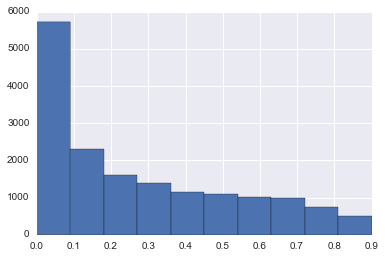

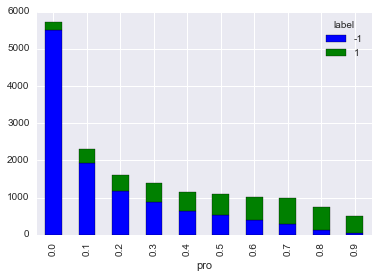

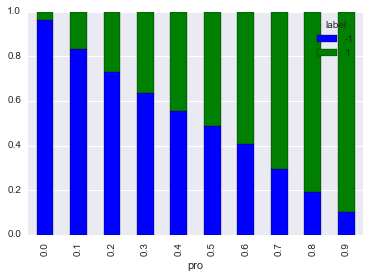

In [76]:
#读入数据
paidan = pd.read_csv('paidan_data/paidan_model_test_data_1212.csv', index_col = 1)
paidan = paidan.fillna(value = 0)


#异常值处理
paidan.loc[paidan.paidan_receiver_distance_jiedan_supplier_max > 10000,"paidan_receiver_distance_jiedan_supplier_max"] = paidan["paidan_receiver_distance_jiedan_supplier_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_receiver_distance_jiedan_supplier_min > 10000,"paidan_receiver_distance_jiedan_supplier_min"] = paidan["paidan_receiver_distance_jiedan_supplier_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_supplier_max > 10000,"paidan_supplier_distance_jiedan_supplier_max"] = paidan["paidan_supplier_distance_jiedan_supplier_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_supplier_min > 10000,"paidan_supplier_distance_jiedan_supplier_min"] = paidan["paidan_supplier_distance_jiedan_supplier_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_receiver_distance_jiedan_receiver_max > 10000,"paidan_receiver_distance_jiedan_receiver_max"] = paidan["paidan_receiver_distance_jiedan_receiver_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_receiver_distance_jiedan_receiver_min > 10000,"paidan_receiver_distance_jiedan_receiver_min"] = paidan["paidan_receiver_distance_jiedan_receiver_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_receiver_max > 10000,"paidan_supplier_distance_jiedan_receiver_max"] = paidan["paidan_supplier_distance_jiedan_receiver_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_receiver_min > 10000,"paidan_supplier_distance_jiedan_receiver_min"] = paidan["paidan_supplier_distance_jiedan_receiver_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.supplier_receiver_distance > 10000,"supplier_receiver_distance"] = paidan["supplier_receiver_distance"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.transporter_supplier_distance > 10000,"transporter_supplier_distance"] = paidan["transporter_supplier_distance"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()

#
del paidan['create_dt']
del paidan['order_source_from']
del paidan['is_cargo_advance_needed']
# del paidan['transporter_before_one_day_paidan_num']
# del paidan['transporter_before_seven_day_paidan_num']
# del paidan['transporter_before_fourteen_day_paidan_num']
# del paidan['supplier_before_one_day_paidan_num']
# del paidan['supplier_before_seven_day_paidan_num']
# del paidan['supplier_before_fourteen_day_paidan_num']
# del paidan['transporter_supplier_before_one_day_paidan_num']
# del paidan['transporter_supplier_before_seven_day_paidan_num']
# del paidan['transporter_supplier_before_fourteen_day_paidan_num']

y_paidan = paidan.iloc[:,-1]
x_paidan = paidan.iloc[:,:-1]

# x_paidan['fee'] = x_paidan['tips_amt'] + x_paidan['fee_sum']
# del x_paidan['tips_amt']
# del x_paidan['allowance_amt']
# del x_paidan['deliver_fee_amt']
# del x_paidan['fee_sum']



x_paidan_index = x_paidan.index
x_paidan_columns = x_paidan.columns
x_paidan = min_max_scaler.transform(x_paidan)
x_paidan =pd.DataFrame(x_paidan, columns = x_paidan_columns, index = x_paidan_index)

test_label = clf_boost.predict(x_paidan)
test_pro = clf_boost.predict_proba(x_paidan)

a1 = accuracy_score(y_paidan,test_label)
a = f1_score(y_paidan,test_label)
b = precision_score(y_paidan,test_label)
c = recall_score(y_paidan,test_label)
d = roc_auc_score(y_paidan,test_label)
e = confusion_matrix(y_paidan,test_label)
print '准确率:',a1
print 'F1:',a
print '命中率：',b
print '查全率：',c
print 'auc:',d
print '混淆矩阵：'
print e



#处理比例
paidan['pro'] = 1 - test_pro[:,0]
paidan_pro = paidan.ix[:,-2:]


paidan_pro['pro'][paidan_pro['pro'] >= 0.9] = 0.9
paidan_pro['pro'][(paidan_pro['pro'] >= 0.8) & (paidan_pro['pro'] < 0.9)]= 0.8
paidan_pro['pro'][(paidan_pro['pro'] >= 0.7) & (paidan_pro['pro'] < 0.8)]= 0.7
paidan_pro['pro'][(paidan_pro['pro'] >= 0.6) & (paidan_pro['pro'] < 0.7)]= 0.6
paidan_pro['pro'][(paidan_pro['pro'] >= 0.5) & (paidan_pro['pro'] < 0.6)]= 0.5
paidan_pro['pro'][(paidan_pro['pro'] >= 0.4) & (paidan_pro['pro'] < 0.5)]= 0.4
paidan_pro['pro'][(paidan_pro['pro'] >= 0.3) & (paidan_pro['pro'] < 0.4)]= 0.3
paidan_pro['pro'][(paidan_pro['pro'] >= 0.2) & (paidan_pro['pro'] < 0.3)]= 0.2
paidan_pro['pro'][(paidan_pro['pro'] >= 0.1) & (paidan_pro['pro'] < 0.2)]= 0.1
paidan_pro['pro'][(paidan_pro['pro'] >= 0.0) & (paidan_pro['pro'] < 0.1)]= 0


pclass_xt = pd.crosstab(paidan_pro['pro'], paidan_pro['label'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
print pclass_xt 
print pclass_xt_pct

plt.hist(paidan_pro['pro'])
plt.show()
pclass_xt.plot(kind = 'bar',stacked = True)
pclass_xt_pct.plot(kind='bar', stacked=True)

c:\python27\lib\site-packages\ipykernel\__main__.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel\__main__.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel\__main__.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel\__main__.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

准确率: 0.778444102113
F1: 0.598224084605
命中率： 0.62996427821
查全率： 0.56952887538
auc: 0.716572058508
混淆矩阵：
[[11151  1761]
 [ 2266  2998]]
label    -1    1
pro             
0.0    5719  331
0.1    2200  371
0.2    1426  470
0.3    1047  499
0.4     759  595
0.5     651  574
0.6     439  624
0.7     362  683
0.8     225  635
0.9      84  482
label        -1         1
pro                      
0.0    0.945289  0.054711
0.1    0.855698  0.144302
0.2    0.752110  0.247890
0.3    0.677232  0.322768
0.4    0.560561  0.439439
0.5    0.531429  0.468571
0.6    0.412982  0.587018
0.7    0.346411  0.653589
0.8    0.261628  0.738372
0.9    0.148410  0.851590


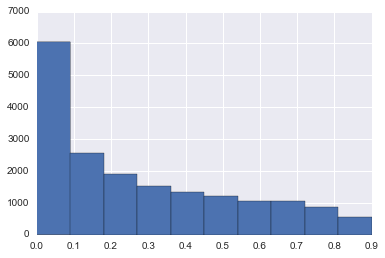

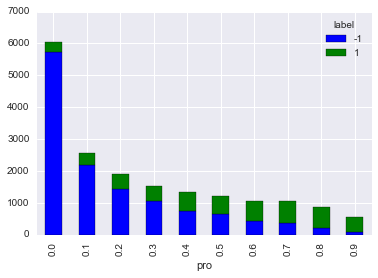

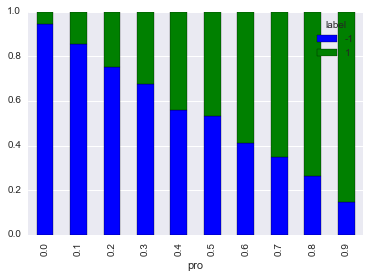

In [75]:
#读入数据
paidan = pd.read_csv('paidan_data/paidan_model_test_data_1213.csv', index_col = 1)
paidan = paidan.fillna(value = 0)


#异常值处理
paidan.loc[paidan.paidan_receiver_distance_jiedan_supplier_max > 10000,"paidan_receiver_distance_jiedan_supplier_max"] = paidan["paidan_receiver_distance_jiedan_supplier_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_receiver_distance_jiedan_supplier_min > 10000,"paidan_receiver_distance_jiedan_supplier_min"] = paidan["paidan_receiver_distance_jiedan_supplier_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_supplier_max > 10000,"paidan_supplier_distance_jiedan_supplier_max"] = paidan["paidan_supplier_distance_jiedan_supplier_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_supplier_min > 10000,"paidan_supplier_distance_jiedan_supplier_min"] = paidan["paidan_supplier_distance_jiedan_supplier_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_receiver_distance_jiedan_receiver_max > 10000,"paidan_receiver_distance_jiedan_receiver_max"] = paidan["paidan_receiver_distance_jiedan_receiver_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_receiver_distance_jiedan_receiver_min > 10000,"paidan_receiver_distance_jiedan_receiver_min"] = paidan["paidan_receiver_distance_jiedan_receiver_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_receiver_max > 10000,"paidan_supplier_distance_jiedan_receiver_max"] = paidan["paidan_supplier_distance_jiedan_receiver_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_receiver_min > 10000,"paidan_supplier_distance_jiedan_receiver_min"] = paidan["paidan_supplier_distance_jiedan_receiver_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.supplier_receiver_distance > 10000,"supplier_receiver_distance"] = paidan["supplier_receiver_distance"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.transporter_supplier_distance > 10000,"transporter_supplier_distance"] = paidan["transporter_supplier_distance"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()

#
del paidan['create_dt']
del paidan['order_source_from']
del paidan['is_cargo_advance_needed']
# del paidan['transporter_before_one_day_paidan_num']
# del paidan['transporter_before_seven_day_paidan_num']
# del paidan['transporter_before_fourteen_day_paidan_num']
# del paidan['supplier_before_one_day_paidan_num']
# del paidan['supplier_before_seven_day_paidan_num']
# del paidan['supplier_before_fourteen_day_paidan_num']
# del paidan['transporter_supplier_before_one_day_paidan_num']
# del paidan['transporter_supplier_before_seven_day_paidan_num']
# del paidan['transporter_supplier_before_fourteen_day_paidan_num']

y_paidan = paidan.iloc[:,-1]
x_paidan = paidan.iloc[:,:-1]

# x_paidan['fee'] = x_paidan['tips_amt'] + x_paidan['fee_sum']
# del x_paidan['tips_amt']
# del x_paidan['allowance_amt']
# del x_paidan['deliver_fee_amt']
# del x_paidan['fee_sum']



x_paidan_index = x_paidan.index
x_paidan_columns = x_paidan.columns
x_paidan = min_max_scaler.transform(x_paidan)
x_paidan =pd.DataFrame(x_paidan, columns = x_paidan_columns, index = x_paidan_index)

test_label = clf_boost.predict(x_paidan)
test_pro = clf_boost.predict_proba(x_paidan)

a1 = accuracy_score(y_paidan,test_label)
a = f1_score(y_paidan,test_label)
b = precision_score(y_paidan,test_label)
c = recall_score(y_paidan,test_label)
d = roc_auc_score(y_paidan,test_label)
e = confusion_matrix(y_paidan,test_label)
print '准确率:',a1
print 'F1:',a
print '命中率：',b
print '查全率：',c
print 'auc:',d
print '混淆矩阵：'
print e



#处理比例
paidan['pro'] = 1 - test_pro[:,0]
paidan_pro = paidan.ix[:,-2:]


paidan_pro['pro'][paidan_pro['pro'] >= 0.9] = 0.9
paidan_pro['pro'][(paidan_pro['pro'] >= 0.8) & (paidan_pro['pro'] < 0.9)]= 0.8
paidan_pro['pro'][(paidan_pro['pro'] >= 0.7) & (paidan_pro['pro'] < 0.8)]= 0.7
paidan_pro['pro'][(paidan_pro['pro'] >= 0.6) & (paidan_pro['pro'] < 0.7)]= 0.6
paidan_pro['pro'][(paidan_pro['pro'] >= 0.5) & (paidan_pro['pro'] < 0.6)]= 0.5
paidan_pro['pro'][(paidan_pro['pro'] >= 0.4) & (paidan_pro['pro'] < 0.5)]= 0.4
paidan_pro['pro'][(paidan_pro['pro'] >= 0.3) & (paidan_pro['pro'] < 0.4)]= 0.3
paidan_pro['pro'][(paidan_pro['pro'] >= 0.2) & (paidan_pro['pro'] < 0.3)]= 0.2
paidan_pro['pro'][(paidan_pro['pro'] >= 0.1) & (paidan_pro['pro'] < 0.2)]= 0.1
paidan_pro['pro'][(paidan_pro['pro'] >= 0.0) & (paidan_pro['pro'] < 0.1)]= 0


pclass_xt = pd.crosstab(paidan_pro['pro'], paidan_pro['label'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
print pclass_xt 
print pclass_xt_pct

plt.hist(paidan_pro['pro'])
plt.show()
pclass_xt.plot(kind = 'bar',stacked = True)
pclass_xt_pct.plot(kind='bar', stacked=True)

c:\python27\lib\site-packages\ipykernel\__main__.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel\__main__.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel\__main__.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel\__main__.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

准确率: 0.772700455886
F1: 0.609040590406
命中率： 0.67935789257
查全率： 0.551914395586
auc: 0.714444247698
混淆矩阵：
[[11106  1558]
 [ 2680  3301]]
label    -1    1
pro             
0.0    5514  312
0.1    2345  509
0.2    1477  594
0.3     986  610
0.4     784  655
0.5     571  655
0.6     419  700
0.7     336  786
0.8     186  711
0.9      46  449
label        -1         1
pro                      
0.0    0.946447  0.053553
0.1    0.821654  0.178346
0.2    0.713182  0.286818
0.3    0.617794  0.382206
0.4    0.544823  0.455177
0.5    0.465742  0.534258
0.6    0.374441  0.625559
0.7    0.299465  0.700535
0.8    0.207358  0.792642
0.9    0.092929  0.907071


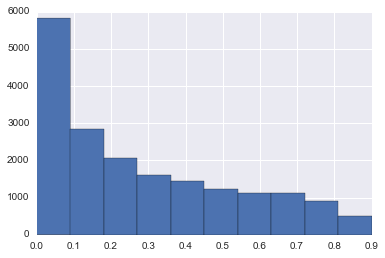

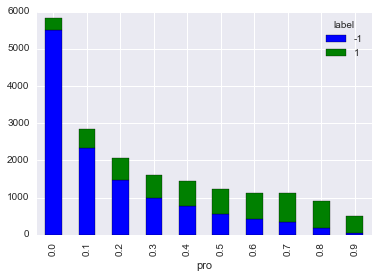

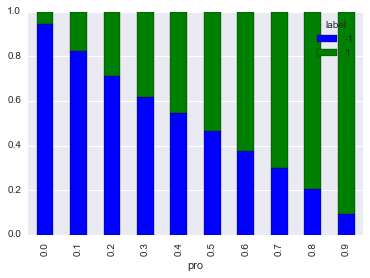

In [74]:
#读入数据
paidan = pd.read_csv('paidan_data/paidan_model_test_data_1214.csv', index_col = 1)
paidan = paidan.fillna(value = 0)


#异常值处理
paidan.loc[paidan.paidan_receiver_distance_jiedan_supplier_max > 10000,"paidan_receiver_distance_jiedan_supplier_max"] = paidan["paidan_receiver_distance_jiedan_supplier_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_receiver_distance_jiedan_supplier_min > 10000,"paidan_receiver_distance_jiedan_supplier_min"] = paidan["paidan_receiver_distance_jiedan_supplier_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_supplier_max > 10000,"paidan_supplier_distance_jiedan_supplier_max"] = paidan["paidan_supplier_distance_jiedan_supplier_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_supplier_min > 10000,"paidan_supplier_distance_jiedan_supplier_min"] = paidan["paidan_supplier_distance_jiedan_supplier_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_receiver_distance_jiedan_receiver_max > 10000,"paidan_receiver_distance_jiedan_receiver_max"] = paidan["paidan_receiver_distance_jiedan_receiver_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_receiver_distance_jiedan_receiver_min > 10000,"paidan_receiver_distance_jiedan_receiver_min"] = paidan["paidan_receiver_distance_jiedan_receiver_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_receiver_max > 10000,"paidan_supplier_distance_jiedan_receiver_max"] = paidan["paidan_supplier_distance_jiedan_receiver_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_receiver_min > 10000,"paidan_supplier_distance_jiedan_receiver_min"] = paidan["paidan_supplier_distance_jiedan_receiver_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.supplier_receiver_distance > 10000,"supplier_receiver_distance"] = paidan["supplier_receiver_distance"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.transporter_supplier_distance > 10000,"transporter_supplier_distance"] = paidan["transporter_supplier_distance"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()

#
del paidan['create_dt']
del paidan['order_source_from']
del paidan['is_cargo_advance_needed']
# del paidan['transporter_before_one_day_paidan_num']
# del paidan['transporter_before_seven_day_paidan_num']
# del paidan['transporter_before_fourteen_day_paidan_num']
# del paidan['supplier_before_one_day_paidan_num']
# del paidan['supplier_before_seven_day_paidan_num']
# del paidan['supplier_before_fourteen_day_paidan_num']
# del paidan['transporter_supplier_before_one_day_paidan_num']
# del paidan['transporter_supplier_before_seven_day_paidan_num']
# del paidan['transporter_supplier_before_fourteen_day_paidan_num']

y_paidan = paidan.iloc[:,-1]
x_paidan = paidan.iloc[:,:-1]

# x_paidan['fee'] = x_paidan['tips_amt'] + x_paidan['fee_sum']
# del x_paidan['tips_amt']
# del x_paidan['allowance_amt']
# del x_paidan['deliver_fee_amt']
# del x_paidan['fee_sum']



x_paidan_index = x_paidan.index
x_paidan_columns = x_paidan.columns
x_paidan = min_max_scaler.transform(x_paidan)
x_paidan =pd.DataFrame(x_paidan, columns = x_paidan_columns, index = x_paidan_index)

test_label = clf_boost.predict(x_paidan)
test_pro = clf_boost.predict_proba(x_paidan)

a1 = accuracy_score(y_paidan,test_label)
a = f1_score(y_paidan,test_label)
b = precision_score(y_paidan,test_label)
c = recall_score(y_paidan,test_label)
d = roc_auc_score(y_paidan,test_label)
e = confusion_matrix(y_paidan,test_label)
print '准确率:',a1
print 'F1:',a
print '命中率：',b
print '查全率：',c
print 'auc:',d
print '混淆矩阵：'
print e



#处理比例
paidan['pro'] = 1 - test_pro[:,0]
paidan_pro = paidan.ix[:,-2:]


paidan_pro['pro'][paidan_pro['pro'] >= 0.9] = 0.9
paidan_pro['pro'][(paidan_pro['pro'] >= 0.8) & (paidan_pro['pro'] < 0.9)]= 0.8
paidan_pro['pro'][(paidan_pro['pro'] >= 0.7) & (paidan_pro['pro'] < 0.8)]= 0.7
paidan_pro['pro'][(paidan_pro['pro'] >= 0.6) & (paidan_pro['pro'] < 0.7)]= 0.6
paidan_pro['pro'][(paidan_pro['pro'] >= 0.5) & (paidan_pro['pro'] < 0.6)]= 0.5
paidan_pro['pro'][(paidan_pro['pro'] >= 0.4) & (paidan_pro['pro'] < 0.5)]= 0.4
paidan_pro['pro'][(paidan_pro['pro'] >= 0.3) & (paidan_pro['pro'] < 0.4)]= 0.3
paidan_pro['pro'][(paidan_pro['pro'] >= 0.2) & (paidan_pro['pro'] < 0.3)]= 0.2
paidan_pro['pro'][(paidan_pro['pro'] >= 0.1) & (paidan_pro['pro'] < 0.2)]= 0.1
paidan_pro['pro'][(paidan_pro['pro'] >= 0.0) & (paidan_pro['pro'] < 0.1)]= 0


pclass_xt = pd.crosstab(paidan_pro['pro'], paidan_pro['label'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
print pclass_xt 
print pclass_xt_pct

plt.hist(paidan_pro['pro'])
plt.show()
pclass_xt.plot(kind = 'bar',stacked = True)
pclass_xt_pct.plot(kind='bar', stacked=True)

c:\python27\lib\site-packages\ipykernel\__main__.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel\__main__.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel\__main__.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel\__main__.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

################################################
#############总体度量###########################
################################################
准确率: 0.770856002902
F1: 0.626956008267
命中率： 0.683566714953
查全率： 0.579004771643
auc: 0.722727030886
混淆矩阵：
[[12755  1966]
 [ 3088  4247]]
################################################
#########按照数量分组###########################
################################################
label    -1     1
pro              
0.0    2168    38
0.1    2081   124
0.2    1974   232
0.3    1833   372
0.4    1673   533
0.5    1519   686
0.6    1286   920
0.7    1052  1153
0.8     738  1468
0.9     397  1809
label        -1         1
pro                      
0.0    0.943494  0.056506
0.1    0.821871  0.178129
0.2    0.714168  0.285832
0.3    0.646967  0.353033
0.4    0.554087  0.445913
0.5    0.468098  0.531902
0.6    0.370719  0.629281
0.7    0.278443  0.721557
0.8    0.187063  0.812937
0.9    0.105863  0.894137


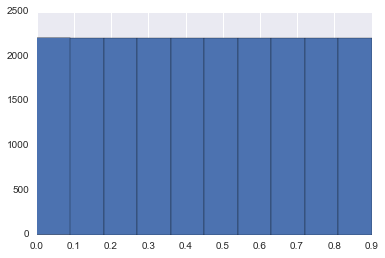

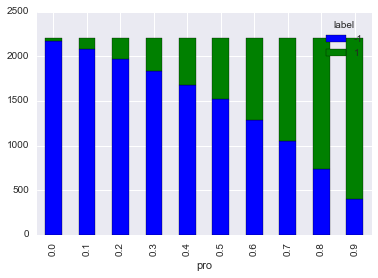

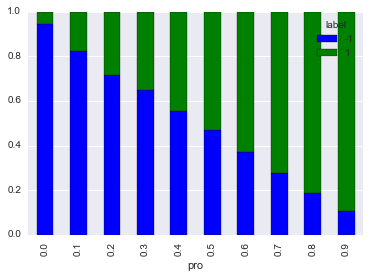

In [106]:
#读入数据
paidan = pd.read_csv('paidan_data/paidan_model_test_data_1215.csv', index_col = 1)
paidan = paidan.fillna(value = 0)


#异常值处理
paidan.loc[paidan.paidan_receiver_distance_jiedan_supplier_max > 10000,"paidan_receiver_distance_jiedan_supplier_max"] = paidan["paidan_receiver_distance_jiedan_supplier_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_receiver_distance_jiedan_supplier_min > 10000,"paidan_receiver_distance_jiedan_supplier_min"] = paidan["paidan_receiver_distance_jiedan_supplier_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_supplier_max > 10000,"paidan_supplier_distance_jiedan_supplier_max"] = paidan["paidan_supplier_distance_jiedan_supplier_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_supplier_min > 10000,"paidan_supplier_distance_jiedan_supplier_min"] = paidan["paidan_supplier_distance_jiedan_supplier_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_receiver_distance_jiedan_receiver_max > 10000,"paidan_receiver_distance_jiedan_receiver_max"] = paidan["paidan_receiver_distance_jiedan_receiver_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_receiver_distance_jiedan_receiver_min > 10000,"paidan_receiver_distance_jiedan_receiver_min"] = paidan["paidan_receiver_distance_jiedan_receiver_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_receiver_max > 10000,"paidan_supplier_distance_jiedan_receiver_max"] = paidan["paidan_supplier_distance_jiedan_receiver_max"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.paidan_supplier_distance_jiedan_receiver_min > 10000,"paidan_supplier_distance_jiedan_receiver_min"] = paidan["paidan_supplier_distance_jiedan_receiver_min"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.supplier_receiver_distance > 10000,"supplier_receiver_distance"] = paidan["supplier_receiver_distance"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()
paidan.loc[paidan.transporter_supplier_distance > 10000,"transporter_supplier_distance"] = paidan["transporter_supplier_distance"][paidan.paidan_receiver_distance_jiedan_supplier_max < 10000].mean()

#
del paidan['create_dt']
del paidan['order_source_from']
del paidan['is_cargo_advance_needed']
# del paidan['transporter_before_one_day_paidan_num']
# del paidan['transporter_before_seven_day_paidan_num']
# del paidan['transporter_before_fourteen_day_paidan_num']
# del paidan['supplier_before_one_day_paidan_num']
# del paidan['supplier_before_seven_day_paidan_num']
# del paidan['supplier_before_fourteen_day_paidan_num']
# del paidan['transporter_supplier_before_one_day_paidan_num']
# del paidan['transporter_supplier_before_seven_day_paidan_num']
# del paidan['transporter_supplier_before_fourteen_day_paidan_num']

y_paidan = paidan.iloc[:,-1]
x_paidan = paidan.iloc[:,:-1]

# x_paidan['fee'] = x_paidan['tips_amt'] + x_paidan['fee_sum']
# del x_paidan['tips_amt']
# del x_paidan['allowance_amt']
# del x_paidan['deliver_fee_amt']
# del x_paidan['fee_sum']



x_paidan_index = x_paidan.index
x_paidan_columns = x_paidan.columns
x_paidan = min_max_scaler.transform(x_paidan)
x_paidan =pd.DataFrame(x_paidan, columns = x_paidan_columns, index = x_paidan_index)

test_label = clf_boost.predict(x_paidan)
test_pro = clf_boost.predict_proba(x_paidan)

a1 = accuracy_score(y_paidan,test_label)
a = f1_score(y_paidan,test_label)
b = precision_score(y_paidan,test_label)
c = recall_score(y_paidan,test_label)
d = roc_auc_score(y_paidan,test_label)
e = confusion_matrix(y_paidan,test_label)
print '################################################'
print '#############总体度量###########################'
print '################################################'
print '准确率:',a1
print 'F1:',a
print '命中率：',b
print '查全率：',c
print 'auc:',d
print '混淆矩阵：'
print e



#处理比例
paidan['pro'] = 1 - test_pro[:,0]
paidan_pro = paidan.ix[:,-2:]
paidan_pro_prencent = paidan_pro.copy()


print '################################################'
print '#########按照数量分组###########################'
print '################################################'
x9 = paidan_pro_prencent['pro'].quantile(0.9).copy()
x8 = paidan_pro_prencent['pro'].quantile(0.8).copy()
x7 = paidan_pro_prencent['pro'].quantile(0.7).copy()
x6 = paidan_pro_prencent['pro'].quantile(0.6).copy()
x5 = paidan_pro_prencent['pro'].quantile(0.5).copy()
x4 = paidan_pro_prencent['pro'].quantile(0.4).copy()
x3 = paidan_pro_prencent['pro'].quantile(0.3).copy()
x2 = paidan_pro_prencent['pro'].quantile(0.2).copy()
x1 = paidan_pro_prencent['pro'].quantile(0.1).copy()
x0 = paidan_pro_prencent['pro'].quantile(0.0).copy()

paidan_pro_prencent['pro'][paidan_pro_prencent['pro'] >= x9] = 0.9
paidan_pro_prencent['pro'][(paidan_pro_prencent['pro'] >= x8) & (paidan_pro_prencent['pro'] < x9)]= 0.8
paidan_pro_prencent['pro'][(paidan_pro_prencent['pro'] >= x7) & (paidan_pro_prencent['pro'] < x8)]= 0.7
paidan_pro_prencent['pro'][(paidan_pro_prencent['pro'] >= x6) & (paidan_pro_prencent['pro'] < x7)]= 0.6
paidan_pro_prencent['pro'][(paidan_pro_prencent['pro'] >= x5) & (paidan_pro_prencent['pro'] < x6)]= 0.5
paidan_pro_prencent['pro'][(paidan_pro_prencent['pro'] >= x4) & (paidan_pro_prencent['pro'] < x5)]= 0.4
paidan_pro_prencent['pro'][(paidan_pro_prencent['pro'] >= x3) & (paidan_pro_prencent['pro'] < x4)]= 0.3
paidan_pro_prencent['pro'][(paidan_pro_prencent['pro'] >= x2) & (paidan_pro_prencent['pro'] < x3)]= 0.2
paidan_pro_prencent['pro'][(paidan_pro_prencent['pro'] >= x1) & (paidan_pro_prencent['pro'] < x2)]= 0.1
paidan_pro_prencent['pro'][(paidan_pro_prencent['pro'] >= x0) & (paidan_pro_prencent['pro'] < x1)]= 0.0

pclass_xt1 = pd.crosstab(paidan_pro_prencent['pro'], paidan_pro_prencent['label'])
pclass_xt_pct1 = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
print pclass_xt1
print pclass_xt_pct1

plt.hist(paidan_pro_prencent['pro'])
plt.show()
pclass_xt1.plot(kind = 'bar',stacked = True)
pclass_xt_pct1.plot(kind='bar', stacked=True)



c:\python27\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\python27\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
c:\python27\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

################################################
#########按照数据分组###########################
################################################
label    -1    1
pro             
0.0    6011  360
0.1    2856  619
0.2    1729  692
0.3    1237  675
0.4     922  742
0.5     763  867
0.6     552  937
0.7     372  964
0.8     214  930
0.9      65  549
label        -1         1
pro                      
0.0    0.943494  0.056506
0.1    0.821871  0.178129
0.2    0.714168  0.285832
0.3    0.646967  0.353033
0.4    0.554087  0.445913
0.5    0.468098  0.531902
0.6    0.370719  0.629281
0.7    0.278443  0.721557
0.8    0.187063  0.812937
0.9    0.105863  0.894137


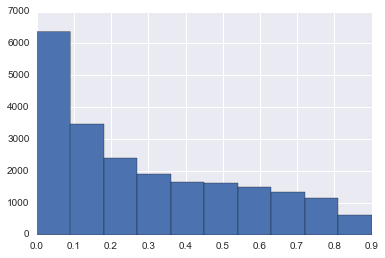

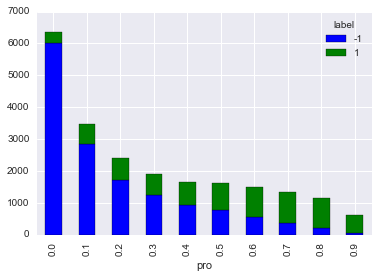

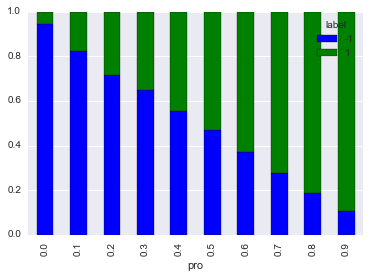

In [107]:
#按照数据分组
paidan_pro['pro'][paidan_pro['pro'] >= 0.9] = 0.9
paidan_pro['pro'][(paidan_pro['pro'] >= 0.8) & (paidan_pro['pro'] < 0.9)]= 0.8
paidan_pro['pro'][(paidan_pro['pro'] >= 0.7) & (paidan_pro['pro'] < 0.8)]= 0.7
paidan_pro['pro'][(paidan_pro['pro'] >= 0.6) & (paidan_pro['pro'] < 0.7)]= 0.6
paidan_pro['pro'][(paidan_pro['pro'] >= 0.5) & (paidan_pro['pro'] < 0.6)]= 0.5
paidan_pro['pro'][(paidan_pro['pro'] >= 0.4) & (paidan_pro['pro'] < 0.5)]= 0.4
paidan_pro['pro'][(paidan_pro['pro'] >= 0.3) & (paidan_pro['pro'] < 0.4)]= 0.3
paidan_pro['pro'][(paidan_pro['pro'] >= 0.2) & (paidan_pro['pro'] < 0.3)]= 0.2
paidan_pro['pro'][(paidan_pro['pro'] >= 0.1) & (paidan_pro['pro'] < 0.2)]= 0.1
paidan_pro['pro'][(paidan_pro['pro'] >= 0.0) & (paidan_pro['pro'] < 0.1)]= 0

print '################################################'
print "#########按照数据分组###########################"
print "################################################"
pclass_xt = pd.crosstab(paidan_pro['pro'], paidan_pro['label'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
print pclass_xt 
print pclass_xt_pct

plt.hist(paidan_pro['pro'])
plt.show()
pclass_xt.plot(kind = 'bar',stacked = True)
pclass_xt_pct.plot(kind='bar', stacked=True)

In [139]:
#全部变量
for cc in [1000,100,10,1,0.1,0.01,0.001]:
    clf_regression = LogisticRegression(C = cc)
    clf_regression.fit(x_train,y_train)



    test_label = clf_regression.predict(x_paidan)

    a1 = accuracy_score(y_paidan,test_label)
    a = f1_score(y_paidan,test_label)
    b = precision_score(y_paidan,test_label)
    c = recall_score(y_paidan,test_label)
    d = roc_auc_score(y_paidan,test_label)
    e = confusion_matrix(y_paidan,test_label)

    print '##############################'
    print cc
    print '训练集准确率',clf_regression.score(x_train,y_train)
    print '测试集准确率:',a1
    print 'F1:',a
    print '命中率：',b
    print '查全率：',c
    print 'auc:',d
    print '混淆矩阵：'
    print e
    print '##########################'

##############################
1000
训练集准确率 0.76632502847
测试集准确率: 0.778699442964
F1: 0.581184828693
命中率： 0.676086376966
查全率： 0.509646302251
auc: 0.70218017019
混淆矩阵：
[[10325  1215]
 [ 2440  2536]]
##########################
##############################
100
训练集准确率 0.766463905786
测试集准确率: 0.778033422136
F1: 0.581220013708
命中率： 0.673372154579
查全率： 0.511254019293
auc: 0.70216080514
混淆矩阵：
[[10306  1234]
 [ 2432  2544]]
##########################
##############################
10
训练集准确率 0.766047273838
测试集准确率: 0.778154516832
F1: 0.583447021373
命中率： 0.671727748691
查全率： 0.515675241158
auc: 0.703504864946
混淆矩阵：
[[10286  1254]
 [ 2410  2566]]
##########################
##############################
1
训练集准确率 0.764852928923
测试集准确率: 0.778578348268
F1: 0.584573440872
命中率： 0.672328194408
查全率： 0.517081993569
auc: 0.704208241152
混淆矩阵：
[[10286  1254]
 [ 2403  2573]]
##########################
##############################
0.1
训练集准确率 0.761436546954
测试集准确率: 0.77670138048
F1: 0.576578645235
命中率： 0.67246920

In [142]:
#10个变量
for cc in [1000,100,10,1,0.1,0.01]:
    clf_regression = LogisticRegression(C = cc)
    clf_regression.fit(x_train,y_train)



    test_label = clf_regression.predict(x_paidan)

    a1 = accuracy_score(y_paidan,test_label)
    a = f1_score(y_paidan,test_label)
    b = precision_score(y_paidan,test_label)
    c = recall_score(y_paidan,test_label)
    d = roc_auc_score(y_paidan,test_label)
    e = confusion_matrix(y_paidan,test_label)

    print '##############################'
    print cc
    print '训练集准确率',clf_regression.score(x_train,y_train)
    print '测试集准确率:',a1
    print 'F1:',a
    print '命中率：',b
    print '查全率：',c
    print 'auc:',d
    print '混淆矩阵：'
    print e
    print '##########################'

##############################
1000
训练集准确率 0.74704885704
测试集准确率: 0.763259869218
F1: 0.549642939415
命中率： 0.643820831085
查全率： 0.479501607717
auc: 0.682558429508
混淆矩阵：
[[10220  1320]
 [ 2590  2386]]
##########################
##############################
100
训练集准确率 0.747104407966
测试集准确率: 0.763259869218
F1: 0.549539170507
命中率： 0.643898488121
查全率： 0.479300643087
auc: 0.68250127475
混淆矩阵：
[[10221  1319]
 [ 2591  2385]]
##########################
##############################
10
训练集准确率 0.747132183429
测试集准确率: 0.76319932187
F1: 0.549372047471
命中率： 0.643802322441
查全率： 0.479099678457
auc: 0.682400792435
混淆矩阵：
[[10221  1319]
 [ 2592  2384]]
##########################
##############################
1
训练集准确率 0.747076632503
测试集准确率: 0.762836037782
F1: 0.547429231658
命中率： 0.643924979614
查全率： 0.476085209003
auc: 0.681283505715
混淆矩阵：
[[10230  1310]
 [ 2607  2369]]
##########################
##############################
0.1
训练集准确率 0.74432686165
测试集准确率: 0.76011140712
F1: 0.533662900188
命中率： 0.644034090

In [167]:
    #20个变量
    clf_regression = LogisticRegression(C = 100)
    clf_regression.fit(x_train,y_train)



    test_label = clf_regression.predict(x_paidan)

    a1 = accuracy_score(y_paidan,test_label)
    a = f1_score(y_paidan,test_label)
    b = precision_score(y_paidan,test_label)
    c = recall_score(y_paidan,test_label)
    d = roc_auc_score(y_paidan,test_label)
    e = confusion_matrix(y_paidan,test_label)

    print '##############################'
    print '训练集准确率',clf_regression.score(x_train,y_train)
    print '测试集准确率:',a1
    print 'F1:',a
    print '命中率：',b
    print '查全率：',c
    print 'auc:',d
    print '混淆矩阵：'
    print e
    print '##########################'

##############################
训练集准确率 0.758908979807
测试集准确率: 0.775187696779
F1: 0.57628665982
命中率： 0.666754687087
查全率： 0.507435691318
auc: 0.699038469576
混淆矩阵：
[[10278  1262]
 [ 2451  2525]]
##########################


In [147]:
clf_regression.coef_

array([[-6.9921563 , -0.40054146,  1.10976899,  1.42424234, -1.65673425,
         2.93538253,  0.21782133,  1.04588249,  1.54415776, -1.48100589,
         0.0530784 , -3.29945399, -0.96103319,  4.39475787,  1.12109441,
        -0.08031601, -0.09246364,  0.75212402,  0.04763725,  0.98716892]])